In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
def simple_edge_detection(image, min_t, max_t):
    edges_detected = cv2.Canny(image, min_t, max_t)
    images = (image, edges_detected)
    return images

In [4]:
def load_images(amount, folder_name, categories, size):
    images = {}
    for category in categories:
        image_list = []
        path = os.path.join(folder_name, category)
        for i, filename in enumerate(os.listdir(path)):
            if i <= amount:
                fullpath = os.path.join(path, filename)
                img_data = Image.open(fullpath)
                img_data = img_data.resize(size)
                img_data = np.asarray(img_data)
                image_list.append(img_data)
            else:
                break

        images[category] = image_list
        
    return images

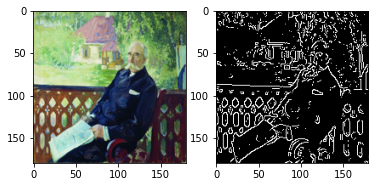

In [21]:
categories = ['Abstract_full', 'Realism_full']
cat_index = 1
images = load_images(100, 'Data', [categories[cat_index]], (180, 180)) 
image = images[categories[cat_index]][79]
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
original, fixed = simple_edge_detection(image, 250, 250)

f, ax = plt.subplots(1, 2)
ax[0].imshow(original)
ax[1].imshow(fixed, cmap='gray')
